<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [8]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [7]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe



🔍 Top 5 Features Most Correlated with Price:
year          0.636009
mileage       0.530659
engineSize    0.411178
tax           0.406895
mpg           0.346419
Name: price, dtype: float64

⛽ Fuel Type Distribution:
fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

📊 Box Plot: Transmission vs Price


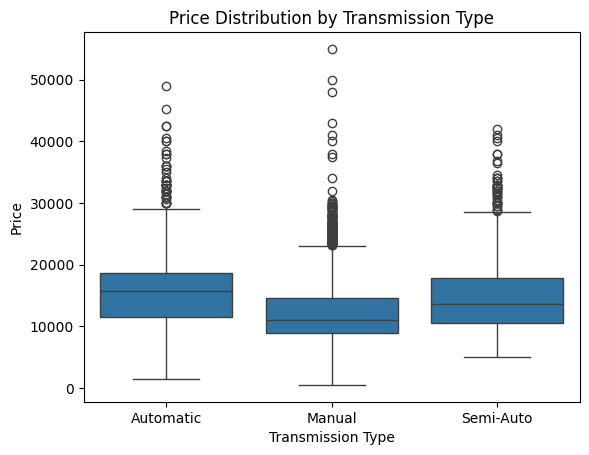


📈 Regression Plot: MPG vs Price


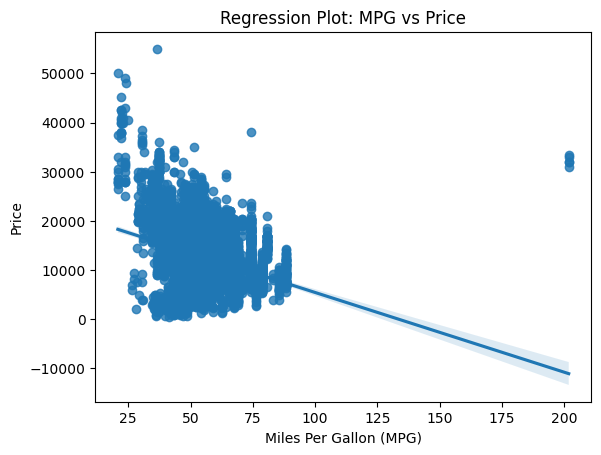


📉 Simple Linear Regression (MPG → Price):
Mean Squared Error: 19781452.810028087
R² Score: 0.1200064498669362

📊 Multiple Linear Regression (year, mileage, tax, mpg, engineSize → Price):
Mean Squared Error: 6142628.72200788
R² Score: 0.7267403103229725

🧮 Polynomial Regression Pipeline (Degree 2):
Mean Squared Error: 5245111.409100894
R² Score: 0.7666670767781905

🪢 Ridge Regression (alpha=0.1):
Mean Squared Error: 6148225.584407105
R² Score: 0.7256732372292748


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.24869e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



🪢 Ridge Regression with Polynomial Features (Degree 2, alpha=0.1):
Mean Squared Error: 5546814.71399673
R² Score: 0.7525074993931788

🔍 Grid Search Ridge Regression with Polynomial Features (Degree 2):
Best alpha: 100
Mean Squared Error: 5538523.78076235
R² Score: 0.752877431309845

📐 Condition Number of Polynomial Feature Matrix: 19.782755328107044


In [33]:
# === Imports ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# === Load Dataset ===
df = pd.read_csv("dataset.csv", header=0)

# === Correlation Analysis ===
numeric_df = df.select_dtypes(include='number')
top_5 = numeric_df.corr()['price'].drop('price').abs().sort_values(ascending=False).head(5)
print("\n🔍 Top 5 Features Most Correlated with Price:")
print(top_5)

# === Fuel Type Distribution ===
print("\n⛽ Fuel Type Distribution:")
print(df['fuelType'].value_counts())

# === Box Plot: Transmission vs Price ===
print("\n📊 Box Plot: Transmission vs Price")
sns.boxplot(x='transmission', y='price', data=df)
plt.title("Price Distribution by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price")
plt.show()

# === Regression Plot: MPG vs Price ===
print("\n📈 Regression Plot: MPG vs Price")
sns.regplot(x='mpg', y='price', data=df)
plt.title("Regression Plot: MPG vs Price")
plt.xlabel("Miles Per Gallon (MPG)")
plt.ylabel("Price")
plt.show()

# === Simple Linear Regression: MPG → Price ===
X_mpg = df[['mpg']].fillna(df[['mpg']].mean())
y_price = df['price'].fillna(df['price'].mean())

model_mpg = LinearRegression()
model_mpg.fit(X_mpg, y_price)
y_pred_mpg = model_mpg.predict(X_mpg)

print("\n📉 Simple Linear Regression (MPG → Price):")
print("Mean Squared Error:", mean_squared_error(y_price, y_pred_mpg))
print("R² Score:", r2_score(y_price, y_pred_mpg))

# === Multiple Linear Regression ===
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X_multi = df[features].fillna(df[features].mean())
y_multi = df['price'].fillna(df['price'].mean())

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)
y_pred_multi = model_multi.predict(X_multi)

print("\n📊 Multiple Linear Regression (year, mileage, tax, mpg, engineSize → Price):")
print("Mean Squared Error:", mean_squared_error(y_multi, y_pred_multi))
print("R² Score:", r2_score(y_multi, y_pred_multi))

# === Polynomial Regression Pipeline (Degree 2) ===
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

pipeline_poly.fit(X_multi, y_multi)
y_pred_poly = pipeline_poly.predict(X_multi)

print("\n🧮 Polynomial Regression Pipeline (Degree 2):")
print("Mean Squared Error:", mean_squared_error(y_multi, y_pred_poly))
print("R² Score:", r2_score(y_multi, y_pred_poly))

# === Ridge Regression ===
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\n🪢 Ridge Regression (alpha=0.1):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))

# === Ridge Regression with Polynomial Features (Degree 2) ===
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)
y_pred_ridge_poly = ridge_poly_model.predict(X_test_poly)

print("\n🪢 Ridge Regression with Polynomial Features (Degree 2, alpha=0.1):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge_poly))
print("R² Score:", r2_score(y_test, y_pred_ridge_poly))

# === Grid Search with Ridge Regression and Polynomial Features ===
pipeline_grid = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline_grid, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

y_pred_grid = grid_search.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print("\n🔍 Grid Search Ridge Regression with Polynomial Features (Degree 2):")
print("Best alpha:", grid_search.best_params_['ridge__alpha'])
print("Mean Squared Error:", mse_grid)
print("R² Score:", r2_grid)

# === Condition Number Check ===
X_scaled = StandardScaler().fit_transform(X_multi)
X_poly_full = PolynomialFeatures(degree=2).fit_transform(X_scaled)
condition_number = np.linalg.cond(X_poly_full)

print("\n📐 Condition Number of Polynomial Feature Matrix:", condition_number)
if condition_number > 1e6:
    print("⚠️ Warning: Ill-conditioned matrix detected. Consider reducing polynomial degree or using interaction_only=True.")

---


# Test Environment


Top 5 features most correlated with price:
year          0.636009
mileage       0.530659
engineSize    0.411178
tax           0.406895
mpg           0.346419
Name: price, dtype: float64

Fuel type distribution:
fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


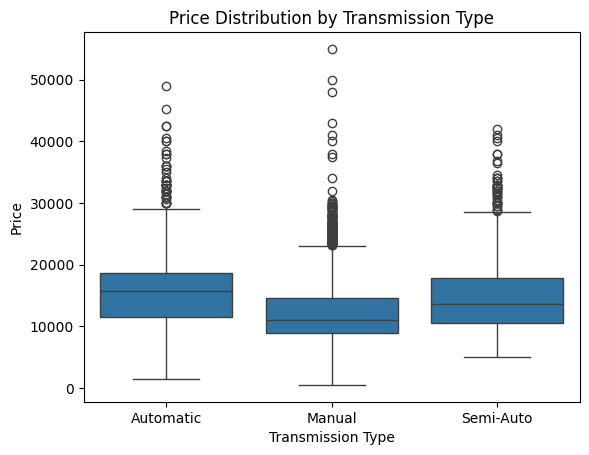

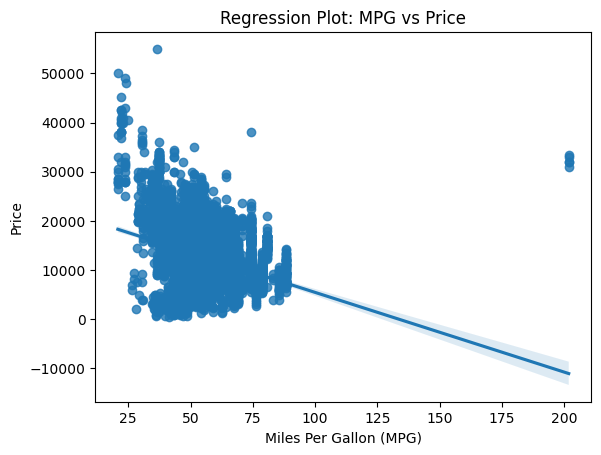


Simple Linear Regression (MPG → Price):
Mean Squared Error: 19781452.810028087
R² Score: 0.1200064498669362

Multiple Linear Regression (year, mileage, tax, mpg, engineSize → Price):
Mean Squared Error: 6142628.72200788
R² Score: 0.7267403103229725
Mean Squared Error (MSE): 5245111.409100894
R² Score: 0.7666670767781905
Ridge Regression Results:
Mean Squared Error (MSE): 6148225.584407105
R² Score: 0.7256732372292748


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.24869e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression with Polynomial Features (Degree 2):
Mean Squared Error (MSE): 5546814.71399673
R² Score: 0.7525074993931788


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("dataset.csv", header=0)

# --- Correlation Analysis ---
numeric_df = df.select_dtypes(include='number')
top_5 = numeric_df.corr()['price'].drop('price').abs().sort_values(ascending=False).head(5)
print("Top 5 features most correlated with price:")
print(top_5)

# --- Value Counts ---
print("\nFuel type distribution:")
print(df['fuelType'].value_counts())

# --- Box Plot: Transmission vs Price ---
sns.boxplot(x='transmission', y='price', data=df)
plt.title("Price Distribution by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price")
plt.show()

# --- Regression Plot: MPG vs Price ---
sns.regplot(x='mpg', y='price', data=df)
plt.title("Regression Plot: MPG vs Price")
plt.xlabel("Miles Per Gallon (MPG)")
plt.ylabel("Price")
plt.show()

# --- Simple Linear Regression: MPG → Price ---
X_mpg = df[['mpg']]
y_price = df['price']

model_mpg = LinearRegression()
model_mpg.fit(X_mpg, y_price)
y_pred_mpg = model_mpg.predict(X_mpg)

print("\nSimple Linear Regression (MPG → Price):")
print("Mean Squared Error:", mean_squared_error(y_price, y_pred_mpg))
print("R² Score:", r2_score(y_price, y_pred_mpg))

# --- Multiple Linear Regression: year, mileage, tax, mpg, engineSize → Price ---
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X_multi = df[features].fillna(df[features].mean())
y_multi = df['price'].fillna(df['price'].mean())

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)
y_pred_multi = model_multi.predict(X_multi)

print("\nMultiple Linear Regression (year, mileage, tax, mpg, engineSize → Price):")
print("Mean Squared Error:", mean_squared_error(y_multi, y_pred_multi))
print("R² Score:", r2_score(y_multi, y_pred_multi))



features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = df[features].fillna(df[features].mean())
y = df['price'].fillna(df['price'].mean())
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict and evaluate
y_pred = pipeline.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = df[features].fillna(df[features].mean())
y = df['price'].fillna(df['price'].mean())

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("dataset.csv", header=0)

# Define source features and target variable
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = df[features].fillna(df[features].mean())
y = df['price'].fillna(df['price'].mean())

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second-degree polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = ridge_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression with Polynomial Features (Degree 2):")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)



## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
